In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

In [3]:
def read(path):
    reval = []
    with open(path, encoding='utf8') as f:
        for line in f:
            if len(line.strip()) == 0:
                continue
            s = line.strip().split()
            vector = [float(v) for v in s]
            reval.append(vector)
    return np.array(reval)

In [4]:
def topKSVD(A, k):
    U, S, V = np.linalg.svd(A, full_matrices=False)
    S = np.diag(S)
    return U[:, :k], S[:k, :k], V[:k]

In [5]:
def ProbA(path):
    A = read(path)
    for k in range(1, 11):
        Uk, Sk, Vk = topKSVD(A, k)
        Ak = np.dot(Uk, np.dot(Sk, Vk))
        delta = A-Ak
        print(LA.norm(delta, 2))

In [9]:
def plot(X):
    x = X[:, 0]
    y = X[:, 1]
    plt.scatter(x, y)
    plt.show()

In [10]:
def ProbB(path):
    A = read(path)
    val = []
    for k in range(1, 31):
        Uk, Sk, Vk = topKSVD(A, k)
        Ak = np.dot(Uk, np.dot(Sk, Vk))
        delta = A-Ak
        val.append(LA.norm(delta, 2))

    valA = LA.norm(A, 2) * 0.1
    print(valA)
    for index, v in enumerate(val):
        if v < valA:
            print(index+1)
    print(val)


def ProbC(path):
    A = read(path)
    U2, S2, V2 = topKSVD(A, 2)

    X = np.dot(U2, S2)
    plot(X)

1862.600132013878
1525.7067069200198
1171.8595134560292
925.121164757476
827.8121130173241
815.2253833442244
639.6119839633453
526.8578361869165
327.03973462773433
227.25204791904363
636.6474948247128
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
[1862.600132013878, 1525.7067069200198, 1171.8595134560292, 925.121164757476, 827.8121130173241, 815.2253833442244, 639.6119839633453, 526.8578361869165, 327.03973462773433, 227.25204791904363, 203.52977500226368, 167.26020009242117, 129.88556353280364, 107.32304619948184, 102.08610723074888, 86.17917152973025, 70.51853358123323, 62.50202356539912, 62.312409205555966, 61.283101862073906, 60.60596213949831, 59.70740277096107, 59.44363174329409, 46.52556263854855, 41.61223903703464, 41.26343388045017, 41.252366209454806, 41.11184061971784, 40.68187493366068, 40.55782558687226]


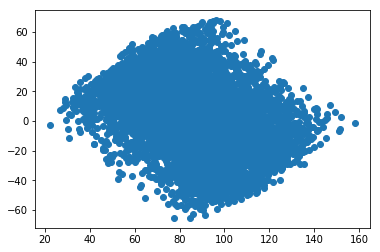

In [11]:
path = 'Data/A.dat'
ProbA(path)
ProbB(path)
ProbC(path)